<a href="https://colab.research.google.com/github/ferdousur/skillmorph/blob/main/Machine_Learning_Skill_Morph_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Welcome to Cancer Detection with Skill Morph!")
print("We will build a Skill Moprh Doctor to detect breast cancer!")

Welcome to Cancer Detection with Skill Morph!
We will build a Skill Moprh Doctor to detect breast cancer!


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/datasets/Breast_Cancer_Wisconsin_Dataset.csv')

Mounted at /content/drive


In [4]:
print(data.columns.tolist())

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [5]:
print(f"Dataset loaded! We have data from {len(data)} real patients")
print(f"Each patient has {len(data.columns)-2} medical measurements")

# Show first few patients
print("\nFirst 5 patients in our dataset:")
print(data[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'area_mean']].head())

# Understand diagnosis column
print(f"\nUnderstanding Diagnosis:")
diagnosis_counts = data['diagnosis'].value_counts()
print(f"M (Malignant = Dangerous Cancer):  {diagnosis_counts['M']} patients")
print(f"B (Benign = Harmless Cancer):      {diagnosis_counts['B']} patients")
print(f"Total patients:                    {len(data)} patients")

Dataset loaded! We have data from 569 real patients
Each patient has 31 medical measurements

First 5 patients in our dataset:
         id diagnosis  radius_mean  texture_mean  area_mean
0    842302         M        17.99         10.38     1001.0
1    842517         M        20.57         17.77     1326.0
2  84300903         M        19.69         21.25     1203.0
3  84348301         M        11.42         20.38      386.1
4  84358402         M        20.29         14.34     1297.0

Understanding Diagnosis:
M (Malignant = Dangerous Cancer):  212 patients
B (Benign = Harmless Cancer):      357 patients
Total patients:                    569 patients


In [6]:
data['diagnosis_encoded']=data['diagnosis'].map({'M':1, 'B':0})

print(data['diagnosis_encoded'])
print(data.isnull().sum())

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_encoded, Length: 569, dtype: int64
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_w

In [7]:

data=data.drop(['id', 'Unnamed: 32'], axis=1)
x=data.drop(['diagnosis', 'diagnosis_encoded'], axis=1)
y=data['diagnosis_encoded']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=20 )

print(len(x_train))
print(len(x_test))

455
114


In [8]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler_data=StandardScaler()
# x_train_scaled=scaler_data.fit_transform(x_train)
# x_test_scaled=scaler_data.transform(x_test)



# print(x_train.values[0][0])
# print(x_train_scaled[0][0])
# # print(x_train.isnull().sum())


In [9]:
skill_morph_dcotor=DecisionTreeClassifier(max_depth=5, random_state=20)

skill_morph_dcotor.fit(x_train, y_train)

print('Train Complete')

Train Complete


In [10]:
predictions=skill_morph_dcotor.predict(x_test)
predictions_probabilites=skill_morph_dcotor.predict_proba(x_test)[:,1]

acuracy=accuracy_score(y_test, predictions)

print(f"Skill Morph Doctor Acuracy: {acuracy:.3f} {acuracy*100:.1f}")


if acuracy > 0.95:
  print('Very Good trained')
elif acuracy > 0.90:
  print("It Perform well")
elif acuracy > 0.80:
  print("It working fine but need improvement")
else:
  print("Need entire improvement")


Skill Morph Doctor Acuracy: 0.956 95.6
Very Good trained


In [11]:
print("\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "M" if y_test.iloc[i] == 1 else "B"
    predicted = "M" if predictions[i] == 1 else "B"
    confidence = predictions_probabilites[i] * 100 if predictions[i] == 1 else (1 - predictions_probabilites[i]) * 100
    correct = "Right" if y_test.iloc[i] == predictions[i] else "Wrong"

    print(f"{i+1:7} | {actual:11} | {predicted:23} | {confidence:8.1f}% | {correct}")




Let's check some predictions with confidence:
Patient | Actual      | Skill Morph Predicted | Confidence | Correct?
----------------------------------------------------------------------
      1 | B           | B                       |    100.0% | Right
      2 | M           | M                       |    100.0% | Right
      3 | M           | M                       |    100.0% | Right
      4 | B           | B                       |     93.3% | Right
      5 | M           | M                       |    100.0% | Right
      6 | M           | M                       |    100.0% | Right
      7 | M           | M                       |    100.0% | Right
      8 | B           | B                       |     93.3% | Right
      9 | B           | B                       |    100.0% | Right
     10 | M           | M                       |    100.0% | Right


In [42]:
#Confusion Mattrix
cm=confusion_matrix(y_test, predictions )

print(cm)

false_negative=cm[0,0]
fasle_positive=cm[0,1]
true_negative=cm[1,0]
true_positive=cm[1,1]

right=false_negative+true_positive
wrong=fasle_positive+true_negative

print("\nHow to read Confusion Matrix:")
print(f"False Negative:  {false_negative} and  False Positive: {fasle_positive}")
print(f"True Negative:  {true_negative} and  True Positive: {true_positive}")

print("Calculate Sum of RIGHT:", right)
print("Calculate Sum or WRONG:", wrong )

print(f"⚠️ DANGER: Missing malignant cancer ({true_negative} cases) is more dangerous than false alarms ({fasle_positive} cases)")


[[65  1]
 [ 4 44]]

How to read Confusion Matrix:
False Negative:  65 and  False Positive: 1
True Negative:  4 and  True Positive: 44
Calculate Sum of RIGHT: 109
Calculate Sum or WRONG: 5
⚠️ DANGER: Missing malignant cancer (4 cases) is more dangerous than false alarms (1 cases)


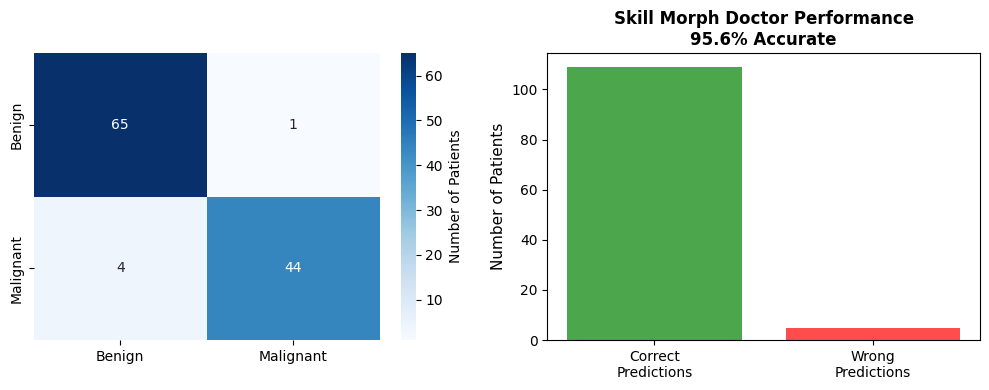

In [41]:
 #plot_
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{acuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)
plt.tight_layout()
plt.show()



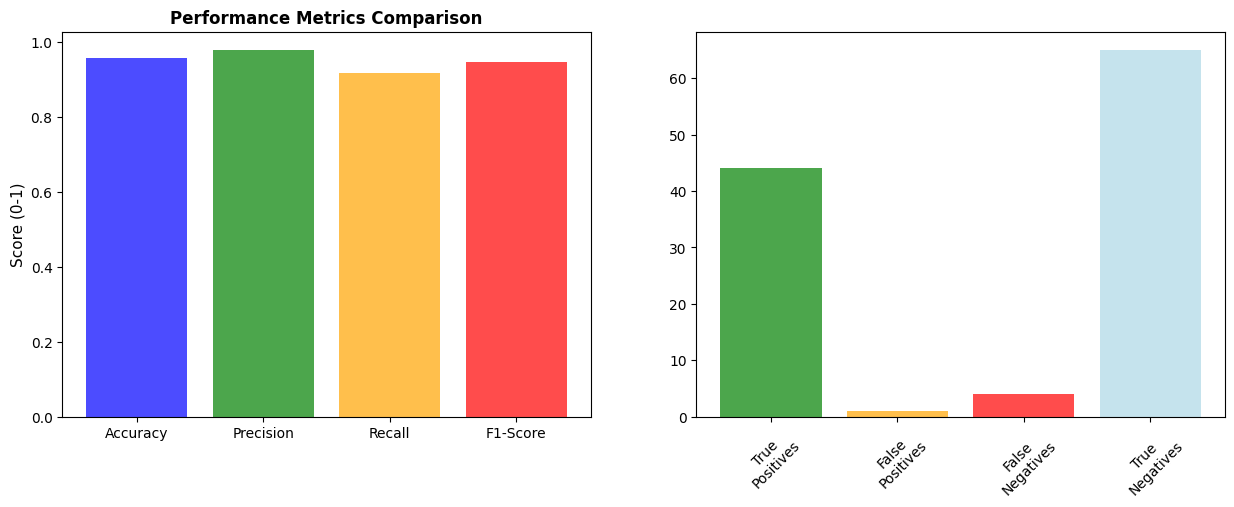

In [40]:
#Details Performance
acuracy=accuracy_score(y_test, predictions)
precision=precision_score(y_test, predictions)
recall=recall_score(y_test, predictions)
f1=f1_score(y_test, predictions)

# print(acuracy)
# print(precision)
# print(recall)
# print(f1)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [acuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)


plt.subplot(1, 2, 2)
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.xticks(rotation=45)
plt.show()







OUR SKILL MORPH DOCTOR AUC SCORE:
AUC Score: 0.9539 (95.39%)


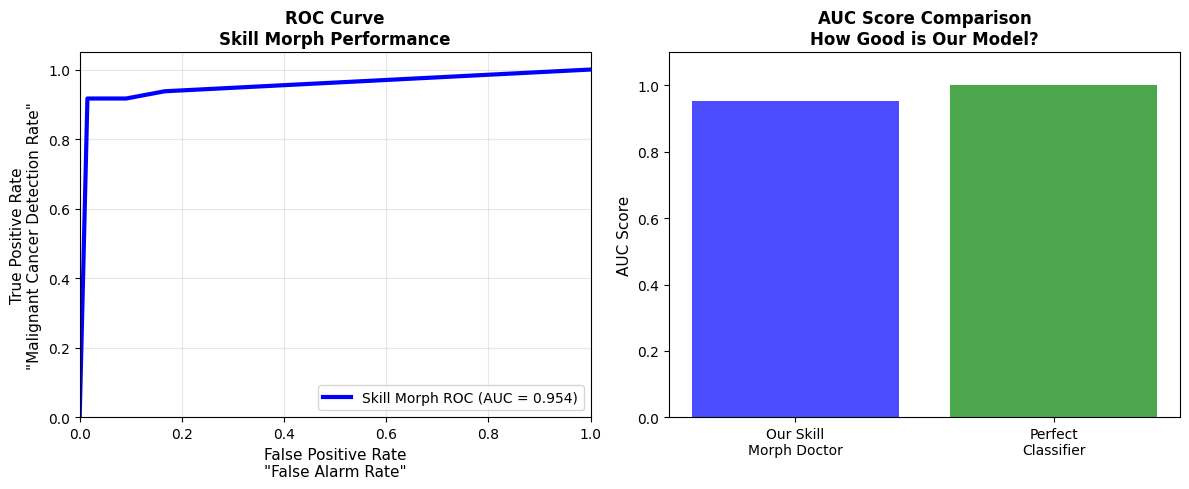

In [39]:

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_probabilites)
auc_score = roc_auc_score(y_test, predictions_probabilites)

print(f"OUR SKILL MORPH DOCTOR AUC SCORE:")
print(f"{'='*40}")
print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create comprehensive ROC visualization
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'Skill Morph ROC (AUC = {auc_score:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n"False Alarm Rate"', fontsize=11)
plt.ylabel('True Positive Rate\n"Malignant Cancer Detection Rate"', fontsize=11)
plt.title('ROC Curve\nSkill Morph Performance', fontweight='bold', fontsize=12)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Our Skill\nMorph Doctor', 'Perfect\nClassifier']
auc_scores = [auc_score, 1.0]
colors_auc = ['blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()
